In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data['frame']

In [2]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Um olhar geral sobre as variaveis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


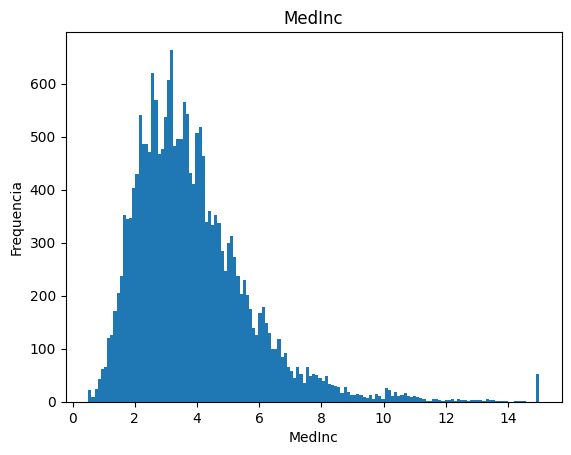

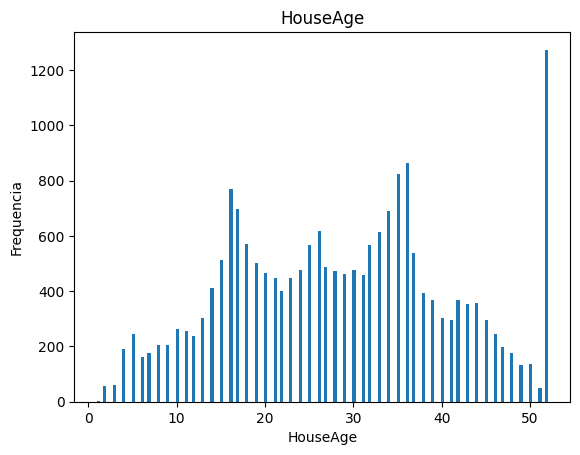

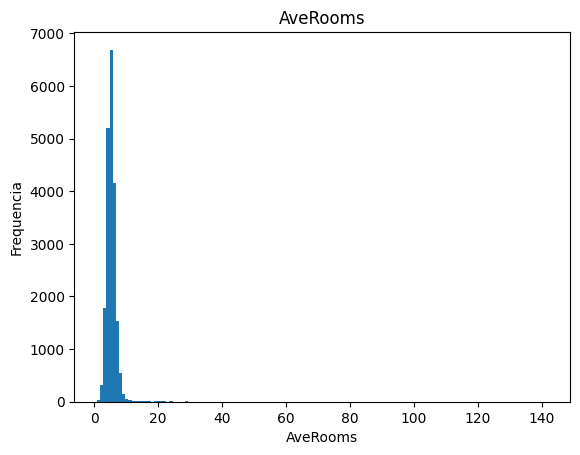

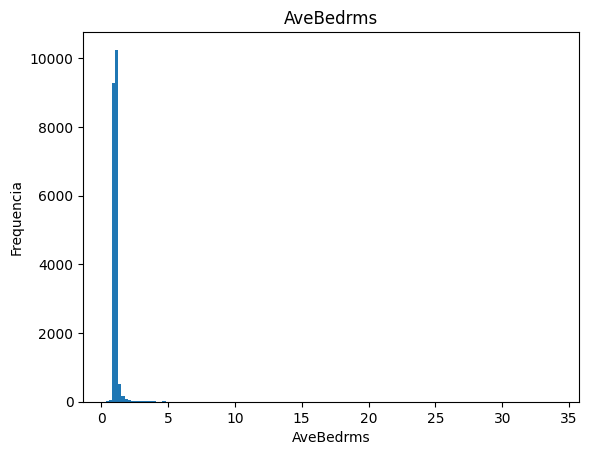

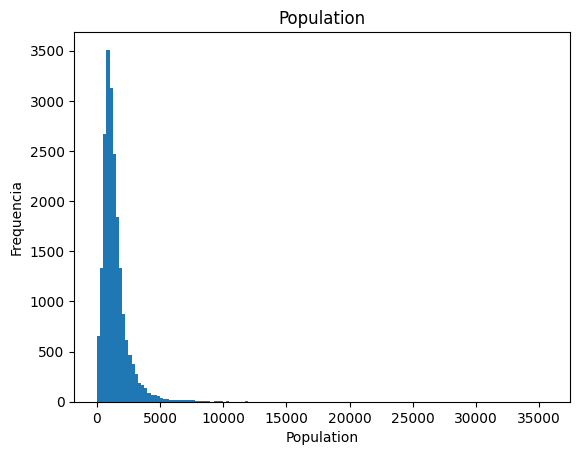

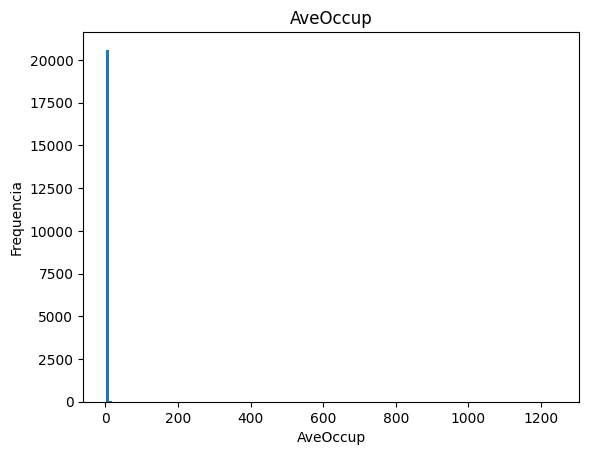

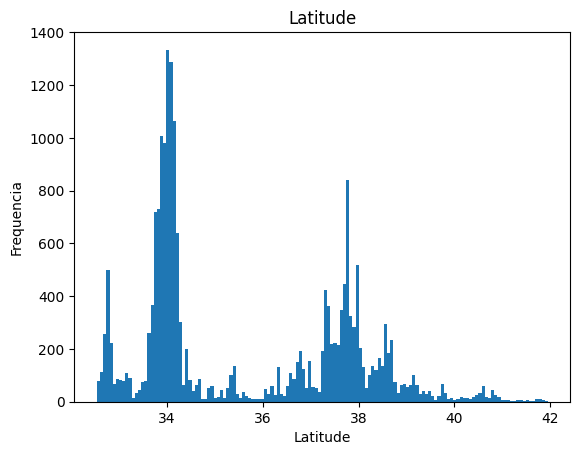

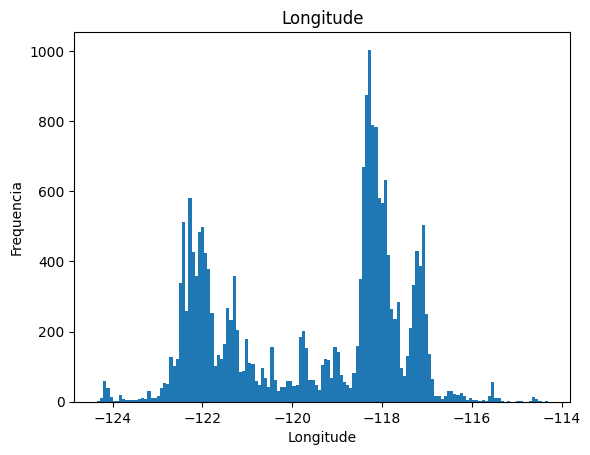

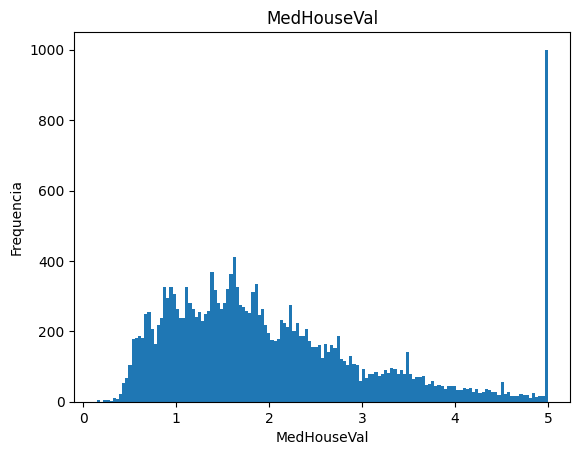

In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = df.shape[0]
bins = int(np.sqrt(num_rows))

def plot_column(df, column):
    plt.figure()
    df[column].plot.hist(bins=bins)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.show()

for column in df.columns:
    plot_column(df, column)


# Analisando cada uma das features

## MedInc

In [7]:
df['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

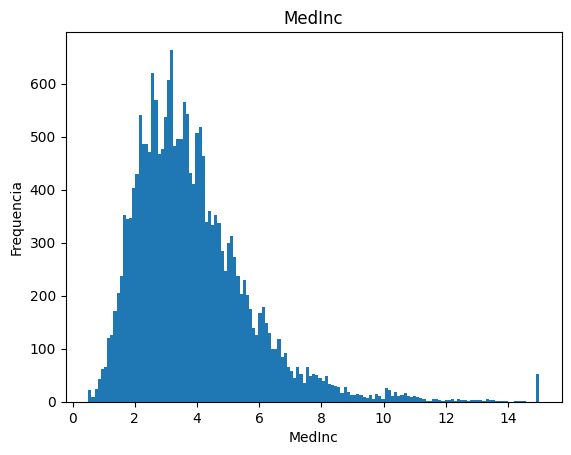

In [8]:
plot_column(df, 'MedInc')

Observações: tem algo estranho lá no 15.

In [9]:
linhas_estranhas = df['MedInc'] > 15
df[linhas_estranhas]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
4352,15.0001,37.0,8.659574,1.425532,100.0,2.127660,34.10,-118.37,5.00001
4604,15.0001,52.0,8.444954,1.100917,693.0,3.178899,34.06,-118.33,5.00001
4605,15.0001,52.0,8.483019,0.962264,813.0,3.067925,34.07,-118.33,5.00001
4606,15.0001,52.0,9.204969,1.062112,531.0,3.298137,34.07,-118.33,5.00001
4626,15.0001,52.0,7.958333,0.833333,457.0,3.808333,34.06,-118.32,5.00001
4678,15.0001,52.0,8.780612,0.994898,688.0,3.510204,34.08,-118.34,5.00001
5242,15.0001,32.0,8.002869,1.080344,1567.0,2.248207,34.11,-118.40,5.00001
5247,15.0001,36.0,9.368263,1.173653,862.0,2.580838,34.09,-118.44,5.00001
5248,15.0001,46.0,8.365591,0.967742,238.0,2.559140,34.08,-118.43,5.00001


In [10]:
linhas_estranhas.value_counts()

False    20591
True        49
Name: MedInc, dtype: int64

Decisão: remover as linhas associadas à renda maior que 15 unidades.

Razão: trata-se de **saturação de valores**, logo não são precisos.

In [11]:
linhas_normais = df['MedInc'] <= 15
linhas_normais.value_counts()

True     20591
False       49
Name: MedInc, dtype: int64

In [12]:
df = df[linhas_normais]

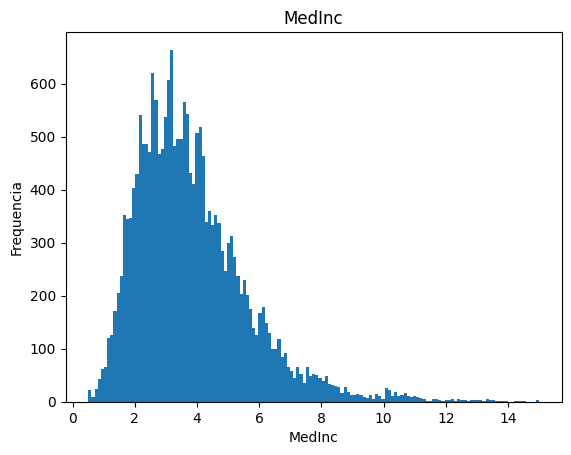

In [13]:
plot_column(df, 'MedInc')

## HouseAge

In [14]:
df['HouseAge'].describe()

count    20591.00000
mean        28.61386
std         12.57557
min          1.00000
25%         18.00000
50%         29.00000
75%         37.00000
max         52.00000
Name: HouseAge, dtype: float64

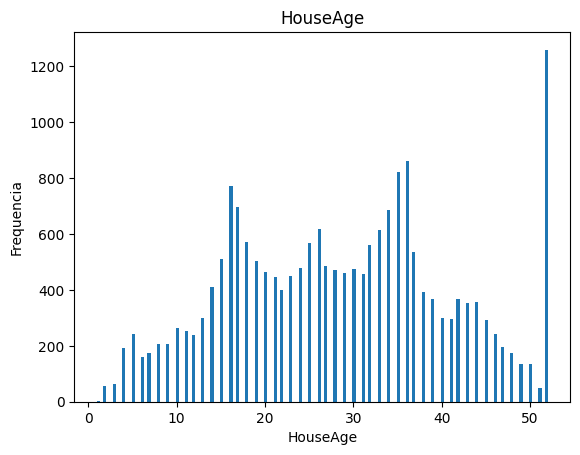

In [15]:
plot_column(df, 'HouseAge')

Aquela alta frequencia no 52 provavelmente é *saturação*. 

Decisão: vamos remover, pois estamos usando um modelo linear mais pra frente

In [16]:
linhas_normais = df['HouseAge'] <= 50
linhas_normais.value_counts()

True     19284
False     1307
Name: HouseAge, dtype: int64

In [17]:
df = df[linhas_normais]

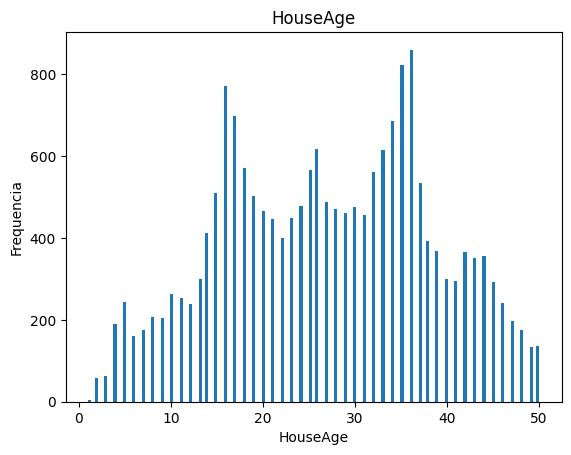

In [18]:
plot_column(df, 'HouseAge')

## AveRooms

In [19]:
df['AveRooms'].describe()

count    19284.000000
mean         5.445474
std          2.525020
min          0.846154
25%          4.454048
50%          5.245136
75%          6.060887
max        141.909091
Name: AveRooms, dtype: float64

Max value muito muito suspeito! Onde que um distrito tem numero médio de comodos na casa dos 140?

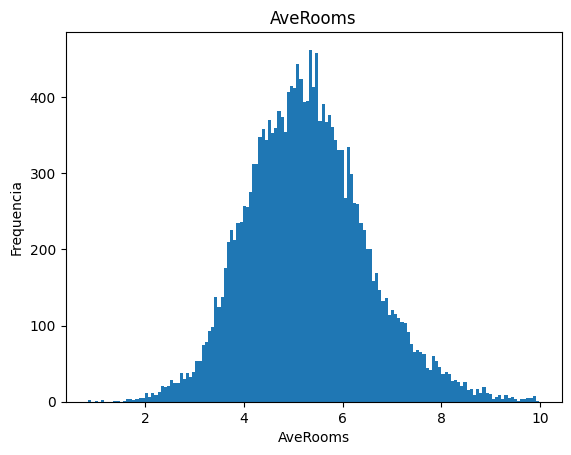

In [20]:
linhas_normais = df['AveRooms'] < 10
plot_column(df[linhas_normais], 'AveRooms')

In [21]:
linhas_normais.value_counts()

True     19064
False      220
Name: AveRooms, dtype: int64

In [22]:
df[df['AveRooms'] > 50]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.06300
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.25000
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400
11707,1.1912,22.0,52.690476,8.857143,98.0,2.333333,39.15,-120.06,1.70000
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.87500


Decisão: eliminar distritos com AveRooms > 10

Razão: São distritos meio anormais do ponto de vista de numero de comodos. Pelo visto no Google maps, devem ser hoteis

In [23]:
df = df[linhas_normais]

## AveBedrms

In [24]:
df['AveBedrms'].describe()

count    19064.000000
mean         1.066326
std          0.128846
min          0.333333
25%          1.005318
50%          1.047486
75%          1.097222
max          3.411111
Name: AveBedrms, dtype: float64

In [25]:
df[df['AveBedrms'] > 30]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


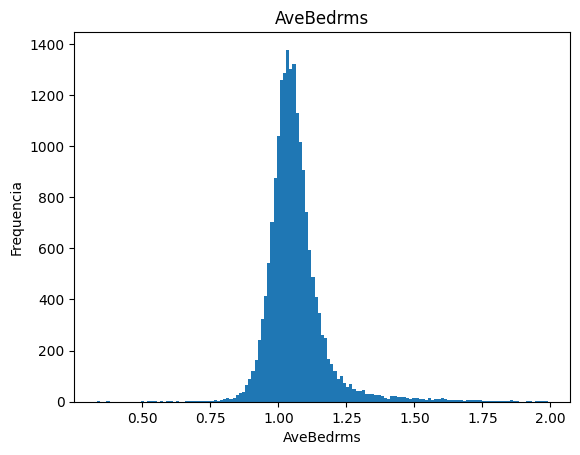

In [26]:
linhas_normais = df['AveBedrms'] < 2
plot_column(df[linhas_normais], 'AveBedrms')

In [27]:
linhas_normais.value_counts()

True     19014
False       50
Name: AveBedrms, dtype: int64

Decisão: eliminar distritos com AveBedrms >= 2 para se manter mais residencial

In [28]:
df = df[linhas_normais]

## AveOccup 

In [29]:
df['AveOccup'].describe()

count    19014.000000
mean         3.093655
std         10.685391
min          0.750000
25%          2.460997
50%          2.848840
75%          3.308246
max       1243.333333
Name: AveOccup, dtype: float64

Valor maximo totalmente sus!

In [30]:
df[df['AveOccup'] > 500]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


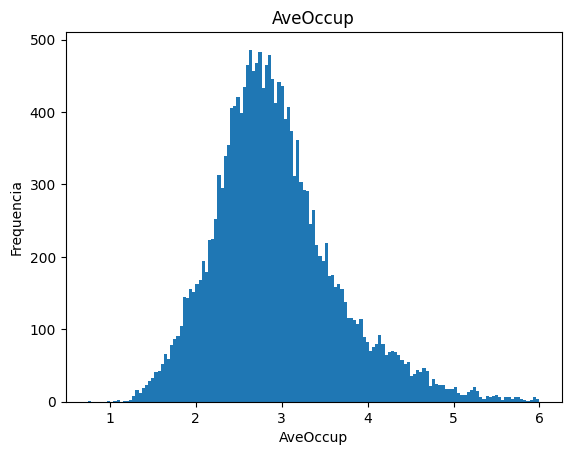

In [31]:
linhas_normais = df['AveOccup'] < 6
plot_column(df[linhas_normais], 'AveOccup')

In [32]:
linhas_normais.value_counts()

True     18918
False       96
Name: AveOccup, dtype: int64

Decisão: eliminar AveOccup > 6, muito anomalo, e no limite extremo são presídios.

In [33]:
df = df[linhas_normais]

## Latitude e Longitude

Nada a ser eliminado aqui, só vamos plotar para entender

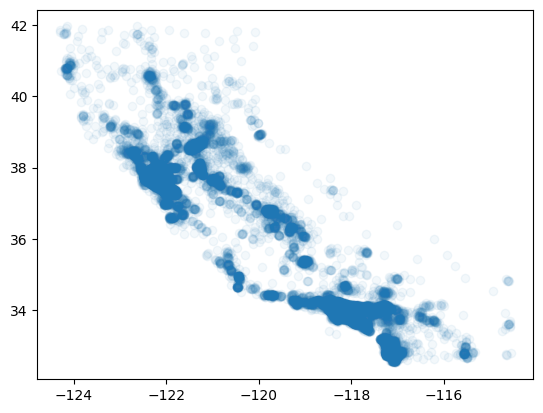

In [34]:
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.05)

## MedHouseVal

In [35]:
df['MedHouseVal'].describe()

count    18918.000000
mean         2.023896
std          1.115944
min          0.149990
25%          1.185000
50%          1.771000
75%          2.577000
max          5.000010
Name: MedHouseVal, dtype: float64

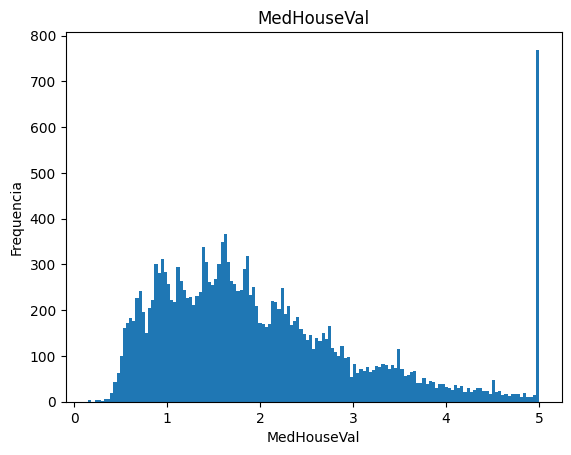

In [36]:
plot_column(df, 'MedHouseVal')

Parece que tem uma saturação em 5.0

In [37]:
linhas_normais = df['MedHouseVal'] < 5
linhas_normais.value_counts()

True     18156
False      762
Name: MedHouseVal, dtype: int64

Decisão: jogar fora linhas com MedHouseVal >= 5.

Razão: saturação

In [38]:
df = df[linhas_normais]

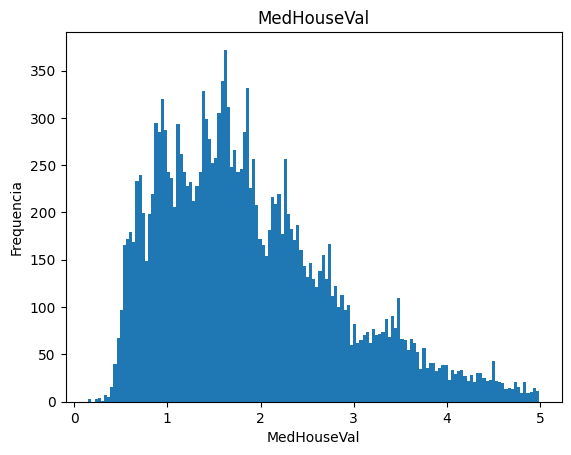

In [39]:
plot_column(df, 'MedHouseVal')

# Analisando o resultado da filtragem

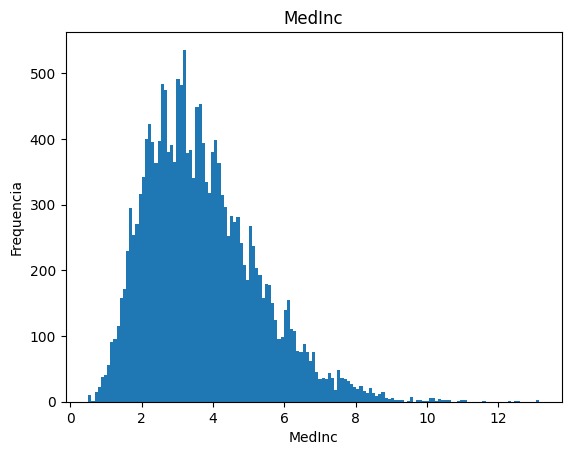

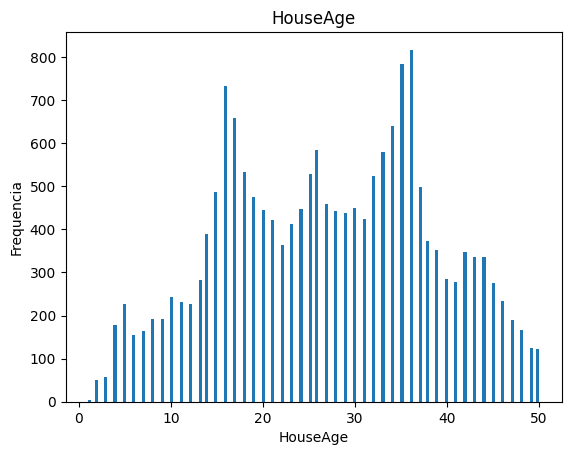

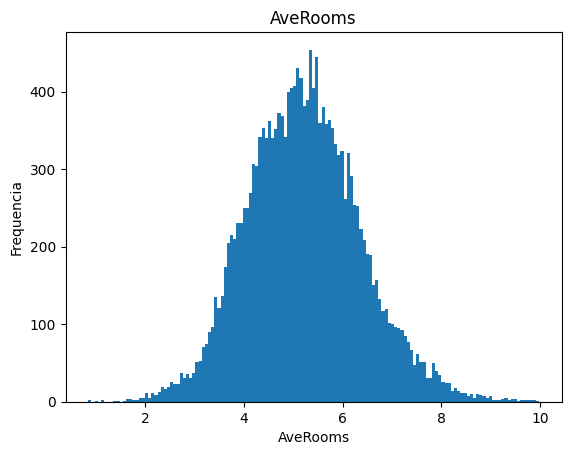

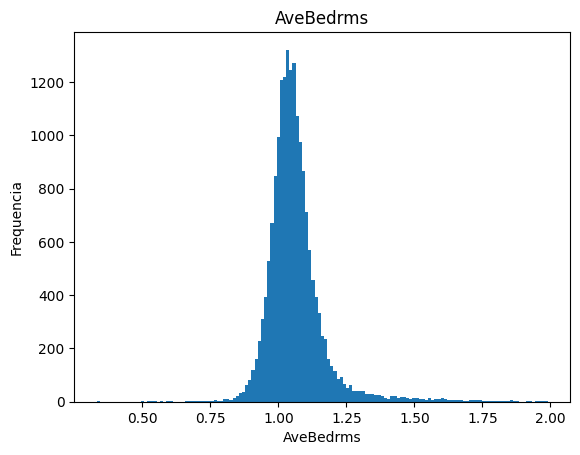

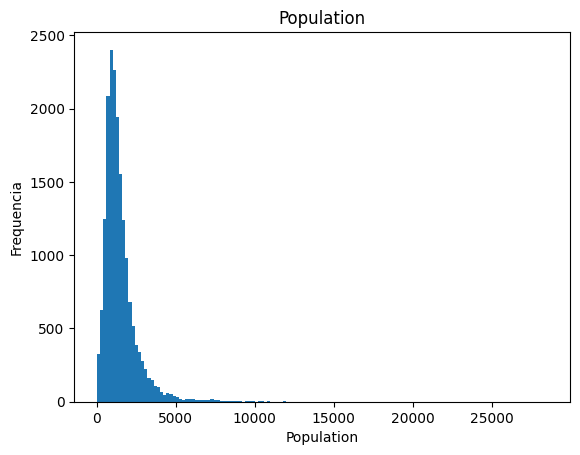

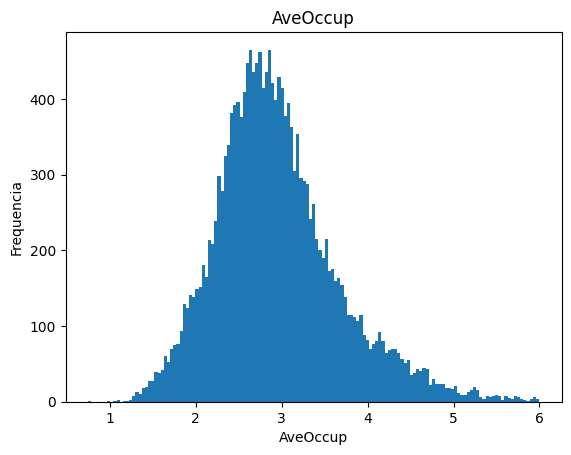

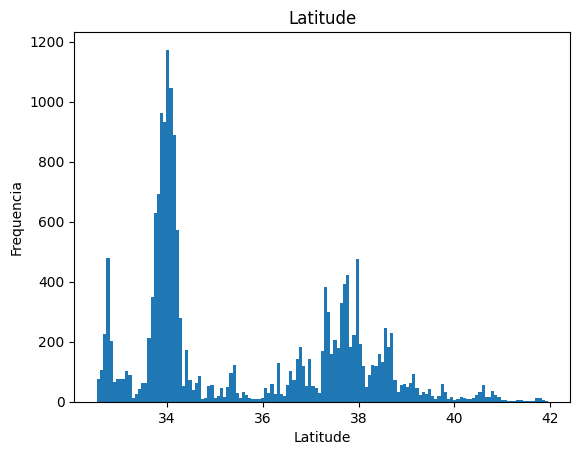

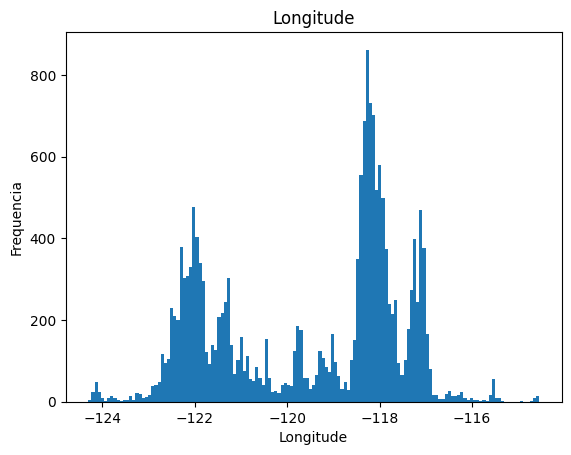

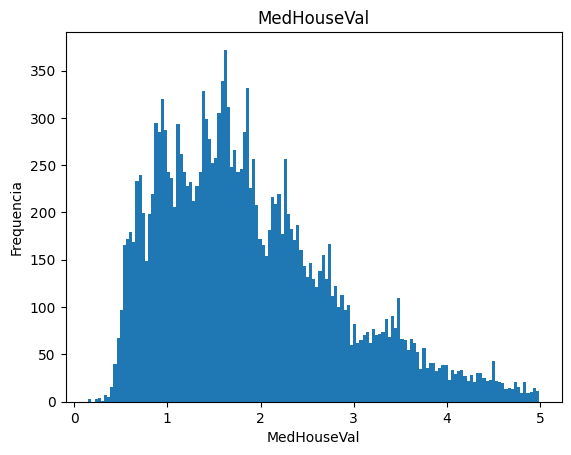

In [40]:
for column in df.columns:
    plot_column(df, column)

# Analise conjunta

In [41]:
features = df.drop(columns=['MedHouseVal']).copy()
target = df['MedHouseVal'].copy()

In [42]:
features.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.204398,0.658370,-0.224871,0.042837,-0.058737,-0.073289,-0.018278
HouseAge,-0.204398,1.000000,-0.260421,-0.140249,-0.298906,0.078684,-0.051506,-0.027596
AveRooms,0.658370,-0.260421,1.000000,0.209640,-0.021357,-0.039531,0.154451,-0.101399
AveBedrms,-0.224871,-0.140249,0.209640,1.000000,-0.010524,-0.114290,0.076049,-0.000714
Population,0.042837,-0.298906,-0.021357,-0.010524,1.000000,0.167764,-0.101611,0.092606
AveOccup,-0.058737,0.078684,-0.039531,-0.114290,0.167764,1.000000,-0.173783,0.176919
Latitude,-0.073289,-0.051506,0.154451,0.076049,-0.101611,-0.173783,1.000000,-0.927505
Longitude,-0.018278,-0.027596,-0.101399,-0.000714,0.092606,0.176919,-0.927505,1.000000


In [43]:
for column in features.columns:
    print(f'{column}: {target.corr(df[column]):.2f}')

MedInc: 0.67
HouseAge: 0.01
AveRooms: 0.28
AveBedrms: -0.13
Population: 0.02
AveOccup: -0.25
Latitude: -0.17
Longitude: -0.02


# Feature engineering

In [44]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2)
features = transformer.fit_transform(features)

In [45]:
import pandas as pd

features = pd.DataFrame(features, columns=transformer.get_feature_names_out())

In [46]:
features = features.drop(columns=['1'])

In [47]:
features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,MedInc HouseAge,...,Population^2,Population AveOccup,Population Latitude,Population Longitude,AveOccup^2,AveOccup Latitude,AveOccup Longitude,Latitude^2,Latitude Longitude,Longitude^2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,69.308955,341.3332,...,103684.0,822.888889,12197.36,-39358.06,6.530864,96.804444,-312.365556,1434.8944,-4630.0724,14940.1729
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,68.913242,174.3294,...,5764801.0,5065.730228,90901.86,-293450.22,4.451433,79.878612,-257.864868,1433.3796,-4627.2492,14937.7284
2,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,4.328064,87.3768,...,1454436.0,2444.430252,45635.04,-147445.56,4.108286,76.697546,-247.807664,1431.8656,-4626.3184,14947.5076
3,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,4.515625,106.2500,...,485809.0,1840.185606,26381.45,-85215.22,6.970400,99.929735,-322.784924,1432.6225,-4627.5410,14947.5076
4,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,3.964479,99.5550,...,980100.0,2339.140811,37461.60,-121037.40,5.582675,89.407160,-288.872076,1431.8656,-4626.3184,14947.5076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18151,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,2.434536,39.0075,...,714025.0,2163.712121,33360.60,-102321.05,6.556703,101.092727,-310.063788,1558.6704,-4780.6332,14662.7881
18152,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,6.537226,46.0224,...,126736.0,1111.719298,14058.44,-43150.76,9.751924,123.319649,-378.515439,1559.4601,-4786.5829,14691.8641
18153,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,2.890000,28.9000,...,1014049.0,2341.914550,39706.01,-122068.54,5.408579,91.699792,-281.913487,1554.7249,-4779.7046,14694.2884
18154,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,3.486436,33.6096,...,549081.0,1573.297994,29217.63,-89898.12,4.508017,83.718138,-257.587736,1554.7249,-4783.6476,14718.5424


# Modelo

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [50]:
X_train.shape, y_train.shape

((13617, 44), (13617,))

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

In [54]:
y_pred.shape, y_test.shape

((4539,), (4539,))

In [55]:
MSE = mean_squared_error(y_test, y_pred)

In [56]:
RMSE = np.sqrt(MSE)

In [57]:
RMSE

0.534861883206571

In [58]:
model.coef_

array([-1.13301235e+01, -6.61777494e-01,  6.91785867e+00, -1.60776308e+01,
       -8.74079328e-04,  3.72999258e+00,  4.72333672e+00,  2.06807733e+00,
       -1.78078619e-02,  3.39481833e-03,  5.70971780e-02, -8.89681350e-02,
        4.87883173e-05, -8.05900619e-02, -1.51254481e-01, -1.43122650e-01,
       -3.28136066e-05, -2.48563237e-03,  2.42615603e-02,  2.93434692e-06,
       -9.60007620e-03, -9.99116320e-03, -8.58296225e-03,  2.62487417e-02,
       -9.40437531e-02, -4.91699867e-05,  1.64740209e-02,  1.09306782e-01,
        9.33487731e-02, -5.45691865e-01,  2.67970339e-04, -2.41497625e-01,
       -4.37196539e-01, -2.85792514e-01,  2.07268036e-09, -1.90106316e-05,
       -1.15487153e-05, -9.18278281e-06,  1.19118539e-01,  5.42420833e-02,
        5.02281538e-02,  3.47609124e-02,  5.98087160e-02,  1.78414156e-02])

In [59]:
model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [60]:
print(f'intercept: {model.intercept_}')
for name, coef in sorted(zip(model.feature_names_in_, model.coef_), key=lambda x:x[1]):
    print(f'{name}: {coef:.4f}')

intercept: 35.099875719579764
AveBedrms: -16.0776
MedInc: -11.3301
HouseAge: -0.6618
AveBedrms^2: -0.5457
AveBedrms Latitude: -0.4372
AveBedrms Longitude: -0.2858
AveBedrms AveOccup: -0.2415
MedInc Latitude: -0.1513
MedInc Longitude: -0.1431
AveRooms AveBedrms: -0.0940
MedInc AveBedrms: -0.0890
MedInc AveOccup: -0.0806
MedInc^2: -0.0178
HouseAge Latitude: -0.0100
HouseAge AveOccup: -0.0096
HouseAge Longitude: -0.0086
HouseAge AveRooms: -0.0025
Population: -0.0009
AveRooms Population: -0.0000
HouseAge^2: -0.0000
Population AveOccup: -0.0000
Population Latitude: -0.0000
Population Longitude: -0.0000
Population^2: 0.0000
HouseAge Population: 0.0000
MedInc Population: 0.0000
AveBedrms Population: 0.0003
MedInc HouseAge: 0.0034
AveRooms AveOccup: 0.0165
Longitude^2: 0.0178
HouseAge AveBedrms: 0.0243
AveRooms^2: 0.0262
Latitude^2: 0.0348
AveOccup Longitude: 0.0502
AveOccup Latitude: 0.0542
MedInc AveRooms: 0.0571
Latitude Longitude: 0.0598
AveRooms Longitude: 0.0933
AveRooms Latitude: 0.1093